# Datos Faltantes

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el conjunto de datos
diabetes = load_diabetes(as_frame=True)
data = diabetes.data
data['target'] = diabetes.target

In [ ]:
data.sample(10)

In [3]:
# Simular valores faltantes
np.random.seed(42)
data.loc[data.sample(frac=0.1).index, 'bmi'] = np.nan
data.loc[data.sample(frac=0.1).index, 'bp'] = np.nan

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado:

### 1. ¿Cuántos valores faltantes hay en cada columna?**

In [5]:
missing_values = data.isnull().sum()
print(missing_values)

age        0
sex        0
bmi       44
bp        44
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64


### 2. Utiliza imputación simple (media) para llenar los valores faltantes de la columna 'bmi'.

In [7]:
# Imputación simple (media) para la columna 'bmi'
imputer = SimpleImputer(strategy='mean')
data['bmi'] = imputer.fit_transform(data[['bmi']])

# Verificar que no haya valores faltantes en 'bmi'
print(data['bmi'].isnull().sum())

0


### 3. Utiliza KNNImputer para imputar valores en las columnas 'bmi' y 'bp'. Compara los resultados con los de la imputación simple.

In [8]:
# Imputación con KNNImputer para las columnas 'bmi' y 'bp'
knn_imputer = KNNImputer(n_neighbors=5)
data_knn_imputed = data.copy()
data_knn_imputed[['bmi', 'bp']] = knn_imputer.fit_transform(data[['bmi', 'bp']])

# Comparar los resultados
print("Valores originales con imputación simple (media):")
print(data[['bmi', 'bp']].head())

print("\nValores imputados con KNNImputer:")
print(data_knn_imputed[['bmi', 'bp']].head())

Valores originales con imputación simple (media):
        bmi        bp
0  0.061696  0.021872
1 -0.051474       NaN
2  0.044451 -0.005670
3 -0.011595 -0.036656
4 -0.036385  0.021872

Valores imputados con KNNImputer:
        bmi        bp
0  0.061696  0.021872
1 -0.051474  0.003970
2  0.044451 -0.005670
3 -0.011595 -0.036656
4 -0.036385  0.021872


### 4. Genera un histograma comparando los datos antes y después de la imputación en la columna 'bmi'.

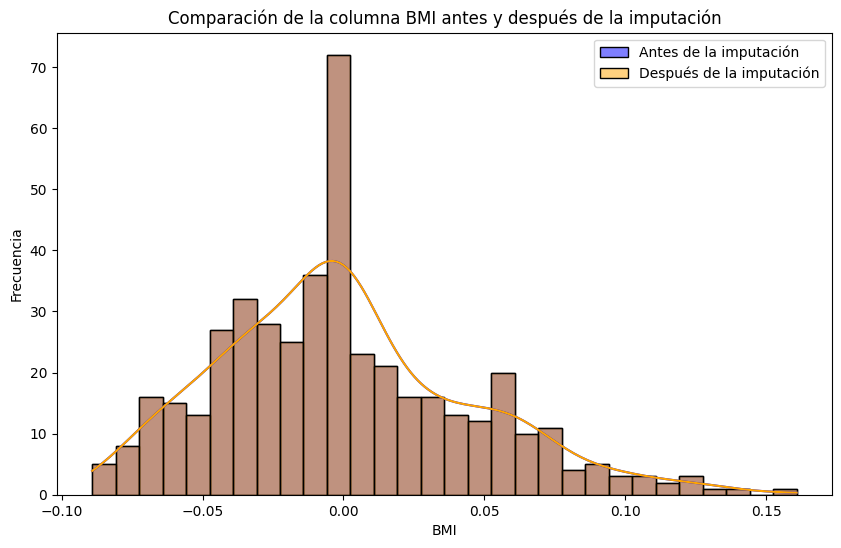

In [9]:
# Histograma comparando los datos antes y después de la imputación en 'bmi'

# Crear una copia del DataFrame original con valores faltantes
data_original = data.copy()

# Aplicar imputación simple (media) nuevamente para asegurar consistencia
imputer = SimpleImputer(strategy='mean')
data_imputed = data.copy()
data_imputed['bmi'] = imputer.fit_transform(data[['bmi']])

# Generar histogramas
plt.figure(figsize=(10, 6))
sns.histplot(data_original['bmi'], color='blue', label='Antes de la imputación', kde=True, bins=30)
sns.histplot(data_imputed['bmi'], color='orange', label='Después de la imputación', kde=True, bins=30)
plt.title('Comparación de la columna BMI antes y después de la imputación')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()